In this notebook, I intend to conduct some statistical modelling and estimation on the gym dataset.
Here I apply Gaussian Mixture Model and Kernel Density Estimation to estimate the distribution of the attendance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv', sep=',')
date = df['date']
new_date = date.str[:-6]
panda_date = pd.to_datetime(new_date)
ts = pd.Series(df['number_people'].tolist(), index=(panda_date))
ts.head()

date
2015-08-14 17:00:11    37
2015-08-14 17:20:14    45
2015-08-14 17:30:15    40
2015-08-14 17:40:16    44
2015-08-14 17:50:17    45
dtype: int64

In [3]:
ts['2016-9-01 00:00:00 ':'2016-9-01 23:59:59']

date
2016-09-01 00:02:16    36
2016-09-01 00:04:57    26
2016-09-01 00:14:59    31
2016-09-01 00:25:00    21
2016-09-01 00:35:01    15
2016-09-01 00:45:03    14
2016-09-01 00:55:04     9
2016-09-01 01:05:06     7
2016-09-01 01:15:07     5
2016-09-01 01:25:08     1
2016-09-01 01:35:08     0
2016-09-01 01:45:09     0
2016-09-01 01:55:10     0
2016-09-01 02:05:10     1
2016-09-01 02:15:11     1
2016-09-01 02:25:12     1
2016-09-01 02:35:12     0
2016-09-01 02:45:13     0
2016-09-01 02:55:14     1
2016-09-01 03:05:14     1
2016-09-01 03:15:15     0
2016-09-01 03:25:16     1
2016-09-01 03:35:17     1
2016-09-01 03:45:18     0
2016-09-01 03:55:18     0
2016-09-01 05:30:32     1
2016-09-01 05:40:33     1
2016-09-01 05:50:33     4
2016-09-01 06:00:34     4
2016-09-01 06:10:35     7
                       ..
2016-09-01 19:03:56    46
2016-09-01 19:13:58    36
2016-09-01 19:24:03    49
2016-09-01 19:34:05    38
2016-09-01 19:44:07    30
2016-09-01 19:54:09    40
2016-09-01 20:04:11    36
2016-09

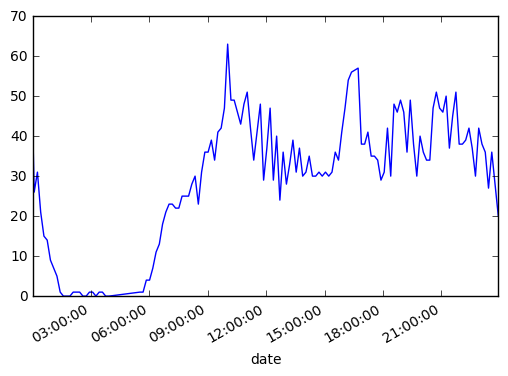

In [4]:
ts['2016-9-01 00:00:00 ':'2016-9-01 23:59:59'].plot()

In [26]:
day = ts['2016-9-01 00:00:00 ':'2016-9-01 23:59:59']
print(min(day))
print(max(day))
print(len(day))

0
63
134


In [46]:
#how many time stamp where the gym is not empty?
#and average people using the gym when the gym is open (assuming it opens when there is > 1 person at the gym)
k=0
j=0
count=0
for i in range(len(day)):
    if day[i] == 0:
        k += 1
    if day [i] == 1:
        j += 1
    else:
        count += day[i]
print(len(day)-(j+k))
print(count)
print(count/(len(day)-(j+k)))

116
3975
34.2672413793


(array([ 0.02487562,  0.00473821,  0.00473821,  0.01421464,  0.02961384,
         0.02724473,  0.02369107,  0.02132196,  0.00592277,  0.00236911]),
 array([  0. ,   6.3,  12.6,  18.9,  25.2,  31.5,  37.8,  44.1,  50.4,
         56.7,  63. ]),
 <a list of 10 Patch objects>)

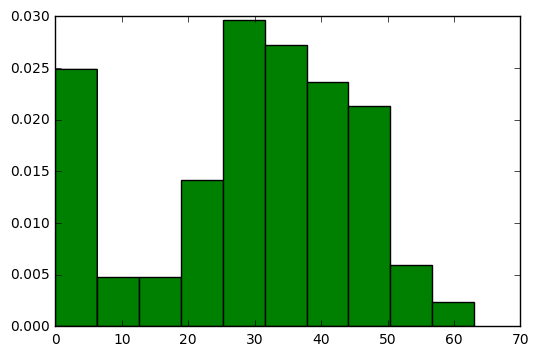

In [54]:
fig, ax = plt.subplots()

ax.hist(day, normed=True, color='g')

In [3]:
#let's only focus on the open time

open_day = ts['2016-9-01 06:00:00 ':'2016-9-01 23:59:59']
open_day

date
2016-09-01 06:00:34     4
2016-09-01 06:10:35     7
2016-09-01 06:20:36    11
2016-09-01 06:30:37    13
2016-09-01 06:40:38    18
2016-09-01 06:50:39    21
2016-09-01 07:00:40    23
2016-09-01 07:10:41    23
2016-09-01 07:20:43    22
2016-09-01 07:30:44    22
2016-09-01 07:40:45    25
2016-09-01 07:50:46    25
2016-09-01 08:00:47    25
2016-09-01 08:10:48    28
2016-09-01 08:20:50    30
2016-09-01 08:30:52    23
2016-09-01 08:40:53    31
2016-09-01 08:50:56    36
2016-09-01 09:00:58    36
2016-09-01 09:10:59    39
2016-09-01 09:21:01    34
2016-09-01 09:31:03    41
2016-09-01 09:41:11    42
2016-09-01 09:51:12    47
2016-09-01 10:01:14    63
2016-09-01 10:11:18    49
2016-09-01 10:21:19    49
2016-09-01 10:31:21    46
2016-09-01 10:41:25    43
2016-09-01 10:51:26    48
                       ..
2016-09-01 19:03:56    46
2016-09-01 19:13:58    36
2016-09-01 19:24:03    49
2016-09-01 19:34:05    38
2016-09-01 19:44:07    30
2016-09-01 19:54:09    40
2016-09-01 20:04:11    36
2016-09

(array([ 0.00319795,  0.00319795,  0.00319795,  0.00319795,  0.00319795,
         0.00639591,  0.01918772,  0.01279181,  0.0479693 ,  0.02558363,
         0.05436521,  0.04157339,  0.03197953,  0.00639591,  0.03837544,
         0.02558363,  0.00319795,  0.00639591,  0.        ,  0.00319795]),
 array([  4.  ,   6.95,   9.9 ,  12.85,  15.8 ,  18.75,  21.7 ,  24.65,
         27.6 ,  30.55,  33.5 ,  36.45,  39.4 ,  42.35,  45.3 ,  48.25,
         51.2 ,  54.15,  57.1 ,  60.05,  63.  ]),
 <a list of 20 Patch objects>)

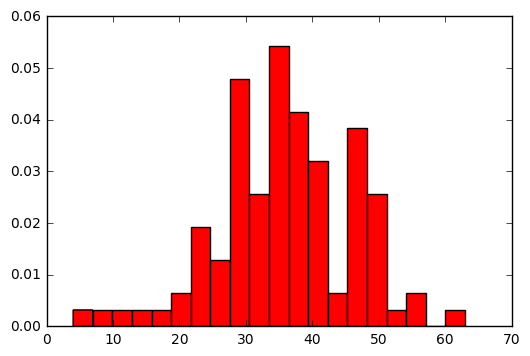

In [4]:
fig, ax = plt.subplots()
ax.hist(open_day.tolist(), normed=True, color='r', bins=20)

In [24]:
xpdf.reshape(1,-1)

array([[   0.        ,    0.95238095,    1.9047619 ,    2.85714286,
           3.80952381,    4.76190476,    5.71428571,    6.66666667,
           7.61904762,    8.57142857,    9.52380952,   10.47619048,
          11.42857143,   12.38095238,   13.33333333,   14.28571429,
          15.23809524,   16.19047619,   17.14285714,   18.0952381 ,
          19.04761905,   20.        ,   20.95238095,   21.9047619 ,
          22.85714286,   23.80952381,   24.76190476,   25.71428571,
          26.66666667,   27.61904762,   28.57142857,   29.52380952,
          30.47619048,   31.42857143,   32.38095238,   33.33333333,
          34.28571429,   35.23809524,   36.19047619,   37.14285714,
          38.0952381 ,   39.04761905,   40.        ,   40.95238095,
          41.9047619 ,   42.85714286,   43.80952381,   44.76190476,
          45.71428571,   46.66666667,   47.61904762,   48.57142857,
          49.52380952,   50.47619048,   51.42857143,   52.38095238,
          53.33333333,   54.28571429,   55.23809

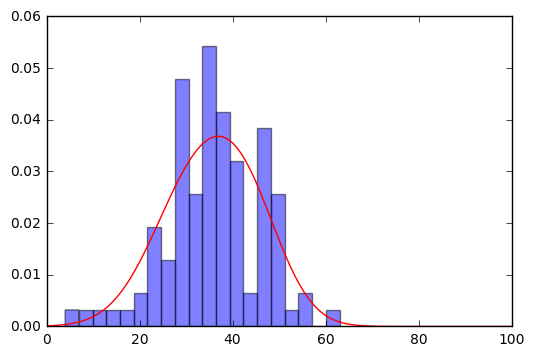

In [50]:
#Density estimation using Gaussian Mixture Model
'''
sklearn.mixture.GaussianMixture(n_components=1, 
covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, 
n_init=1, init_params='kmeans', weights_init=None, means_init=None, 
precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10).

Gaussian Mixture.
Representation of a Gaussian mixture model probability distribution. 
This class allows to estimate the parameters of a Gaussian mixture distribution.

'''

from sklearn.mixture import GaussianMixture

clf = GaussianMixture(2, max_iter=100, random_state=3).fit(np.array(open_day)[:, None])
#xpdf = np.linspace(-10, 20, 1000)
xpdf = np.linspace(0,100,len(np.array(open_day)))
density = np.exp(clf.score_samples(xpdf[:, None])) #use score_samples instead of score

plt.hist(open_day, 20, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')
#plt.xlim(-10, 20);

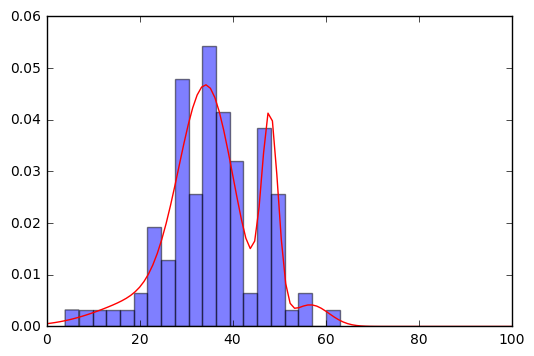

In [52]:
clf = GaussianMixture(4, max_iter=100, random_state=3).fit(np.array(open_day)[:, None])
#xpdf = np.linspace(-10, 20, 1000)
xpdf = np.linspace(0,100,len(np.array(open_day)))
density = np.exp(clf.score_samples(xpdf[:, None])) #use score_samples instead of score

plt.hist(open_day, 20, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')

In [39]:
clf.means_

array([[ 35.91509434]])

In [40]:
clf.weights_

array([ 1.])

In [45]:
print(clf.bic(np.array(open_day)[:, None])) #bayesian information criterion
print(clf.aic(np.array(open_day)[:, None])) #aikaki information criterion

''' aic measures the relative quality of statistical models for a given set of data'''
''' bic is closely related to aic. Lower score is preferred.'''

807.243244997
801.916366809


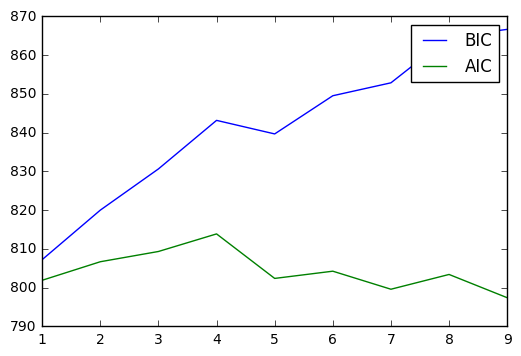

In [53]:
n_estimators = np.arange(1, 10)
clfs = [GaussianMixture(n).fit(np.array(open_day)[:, None]) for n in n_estimators]
bics = [clf.bic(np.array(open_day)[:, None]) for clf in clfs]
aics = [clf.aic(np.array(open_day)[:, None]) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend()

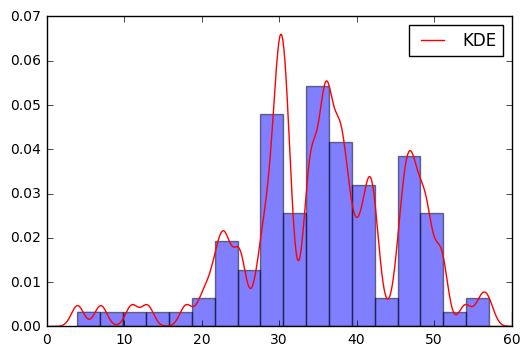

In [31]:
from sklearn.neighbors import KernelDensity

'''
class sklearn.neighbors.KernelDensity(bandwidth=1.0, algorithm=’auto’, kernel=’gaussian’,
metric=’euclidean’, atol=0, rtol=0, breadth_first=True,
leaf_size=40, metric_params=None)

'''

#kde = KernelDensity(0.15).fit(x[:, None])
kde = KernelDensity(bandwidth=0.8, algorithm='auto', kernel='gaussian').fit(np.array(open_day)[:, None])
xpdf = np.linspace(0,60,1000)
density_kde = np.exp(kde.score_samples(xpdf[:, None]))

plt.hist(open_day, 20, normed=True, alpha=0.5)
#plt.plot(xpdf, density, '-b', label='GMM')
plt.plot(xpdf, density_kde, '-r', label='KDE')
plt.xlim(0, 60)
plt.legend();

In [33]:
#Poisson Distribution for Maximum Likelihood

#calculate likelihood for any given value in open_day

poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / (np.arange(x)+1).prod()
lam = 5
y = np.array(open_day)
np.sum(poisson_like(yi, lam) for yi in y)

0.70815953979588153

In [46]:
lam = 3
np.sum(poisson_like(yi, lam) for yi in y)

9.8464835128894652

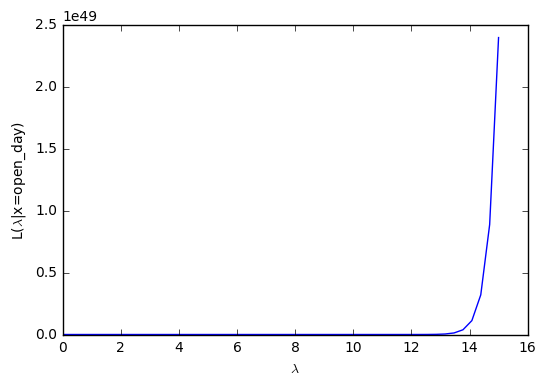

In [56]:
lambdas = np.linspace(0,15)

for l in lambdas:
    total = np.sum(poisson_like(yi, lambdas) for yi in y)

plt.plot(lambdas, total)
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x=open_day)')
#plt.yaxis(False)